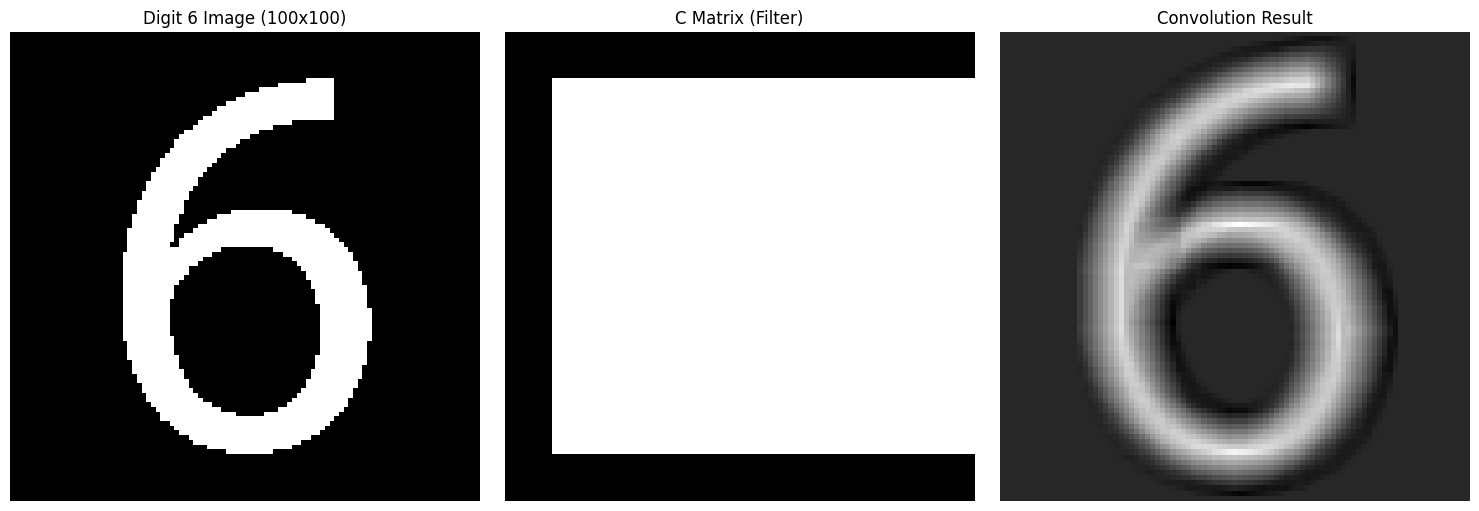

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convolution function
def conv2d(input_array, kernel, padding=0, stride=1):
    input_array = np.array(input_array)
    kernel = np.array(kernel)

    if isinstance(padding, int):
        pad_h = pad_w = padding
    else:
        pad_h, pad_w = padding

    if isinstance(stride, int):
        stride_h = stride_w = stride
    else:
        stride_h, stride_w = stride

    input_padded = np.pad(input_array, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    in_h, in_w = input_padded.shape
    k_h, k_w = kernel.shape

    out_h = ((in_h - k_h) // stride_h) + 1
    out_w = ((in_w - k_w) // stride_w) + 1

    output = np.zeros((out_h, out_w))

    for i in range(out_h):
        for j in range(out_w):
            region = input_padded[i * stride_h : i * stride_h + k_h, j * stride_w : j * stride_w + k_w]
            output[i, j] = np.sum(region * kernel)

    return output

def load_and_resize_digit6(image_path, size=(100, 100)):
    image = Image.open(image_path).convert('L')
    image_resized = image.resize(size, Image.LANCZOS)
    image_array = np.array(image_resized)
    image_array = (image_array > 128).astype(int)
    return image_array

def create_C_matrix(n=10):
    matrix = np.ones((n, n), dtype=int)
    matrix[0, :] = -1
    matrix[:, 0] = -1
    matrix[-1, :] = -1
    return matrix

if __name__ == "__main__":
    digit6_image_path = '6im.jpg'
    digit6_matrix = load_and_resize_digit6(digit6_image_path, size=(100, 100))

    c_matrix = create_C_matrix(10)

    conv_result = conv2d(digit6_matrix, c_matrix, padding=0, stride=1)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(digit6_matrix, cmap='gray', interpolation='nearest')
    axs[0].set_title("Digit 6 Image (100x100)")
    axs[0].axis("off")

    axs[1].imshow(c_matrix, cmap='gray', interpolation='nearest')
    axs[1].set_title("C Matrix (Filter)")
    axs[1].axis("off")

    axs[2].imshow(conv_result, cmap='gray', interpolation='nearest')
    axs[2].set_title("Convolution Result")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()


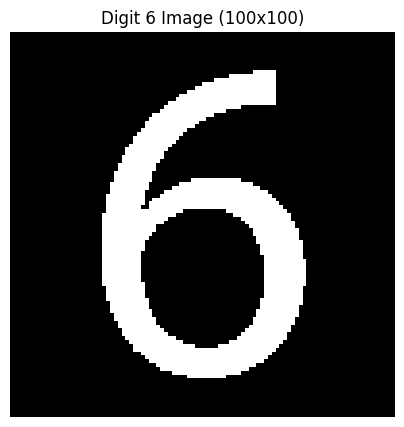

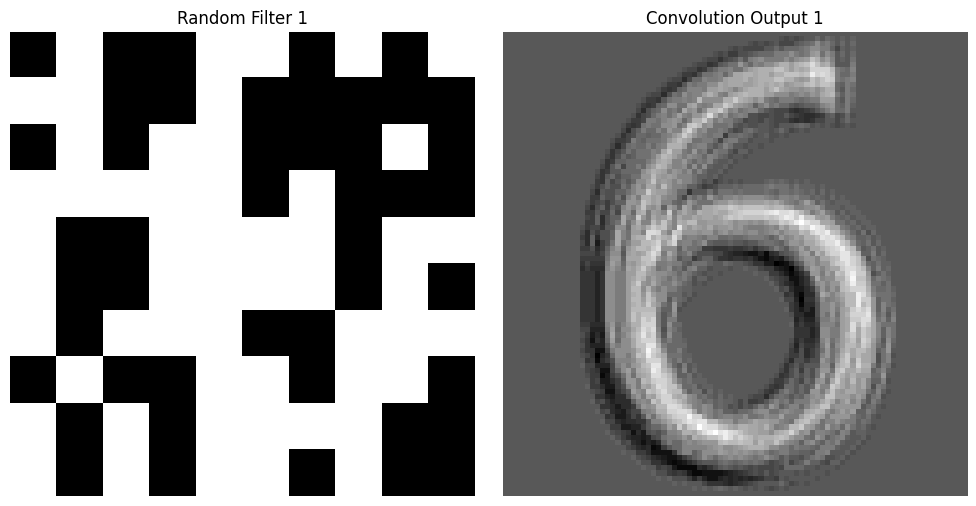

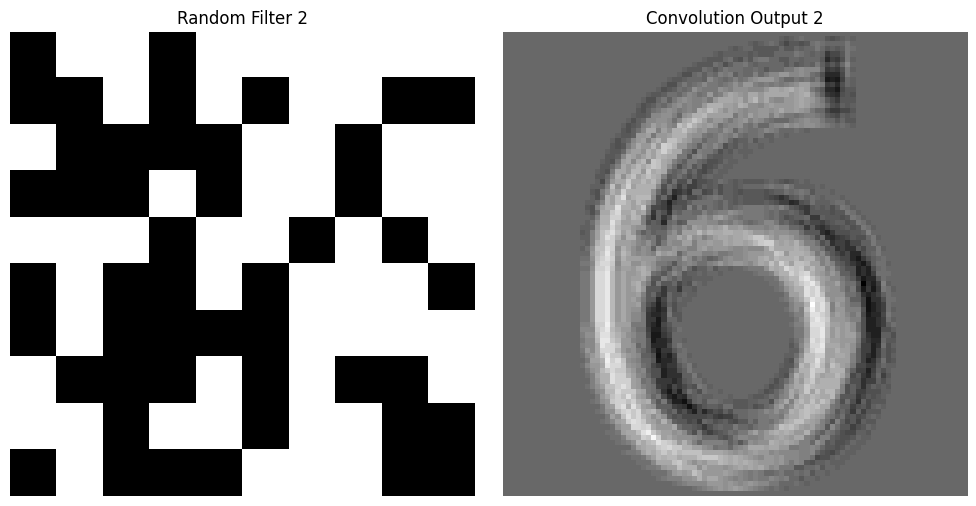

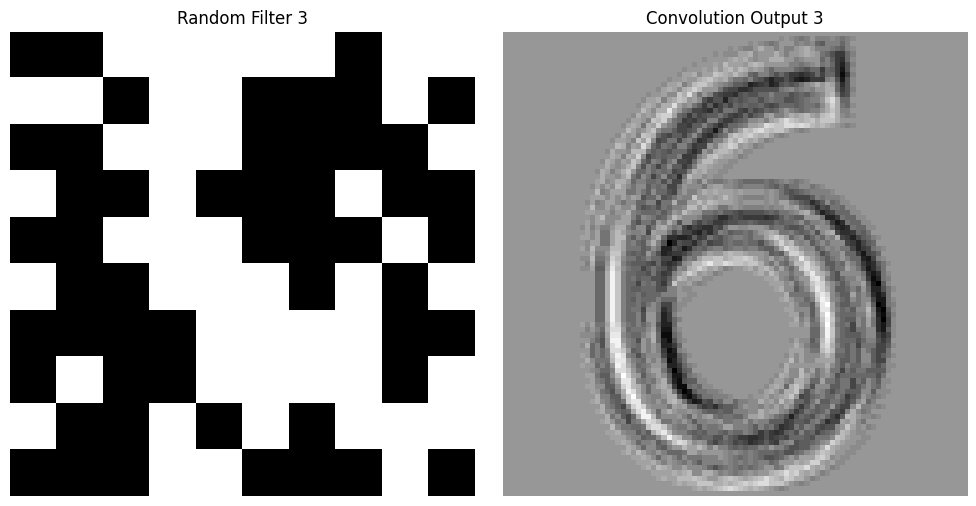

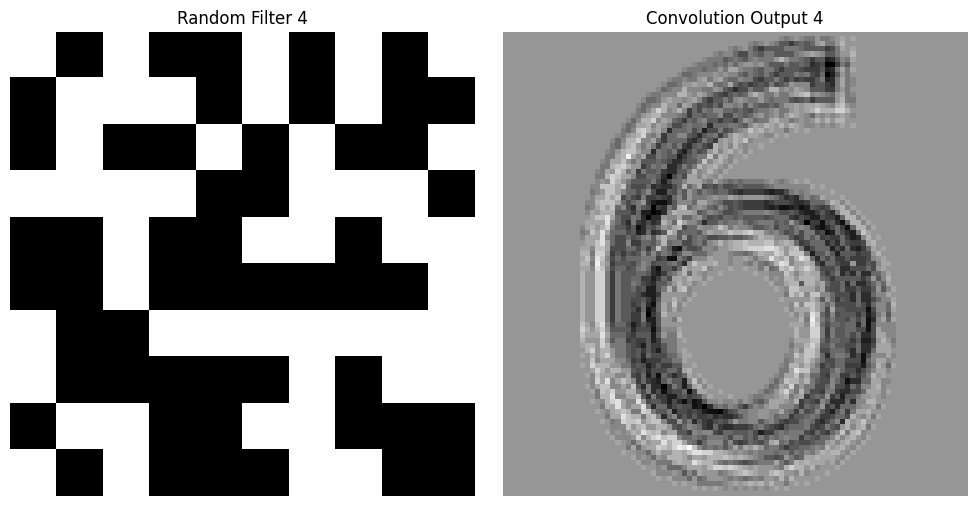

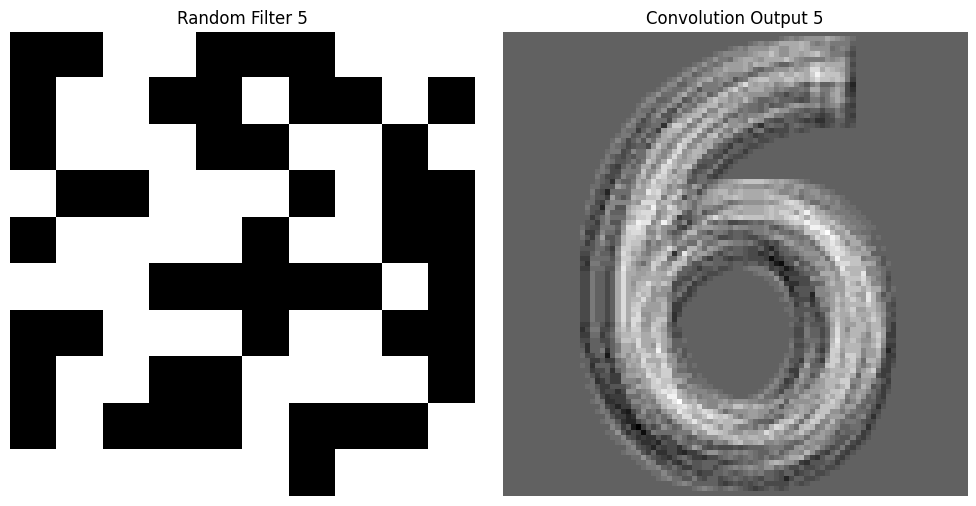

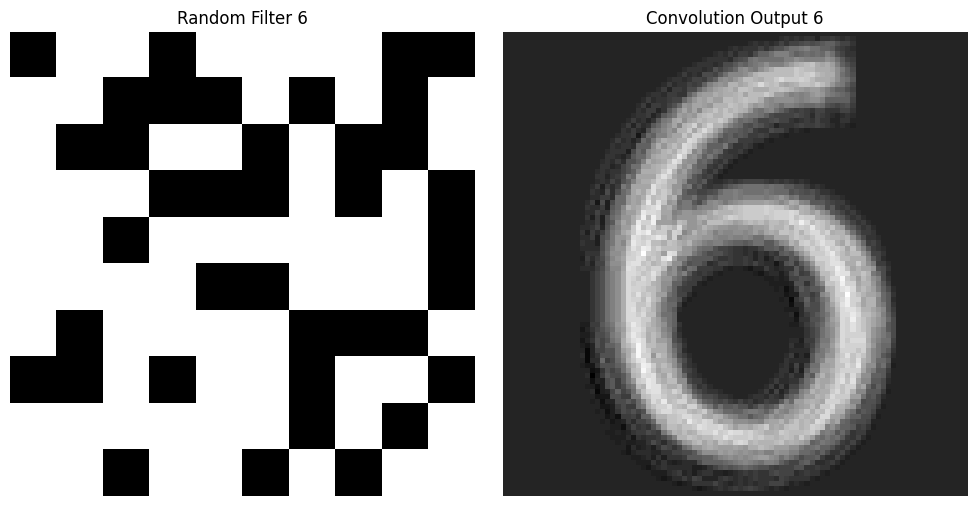

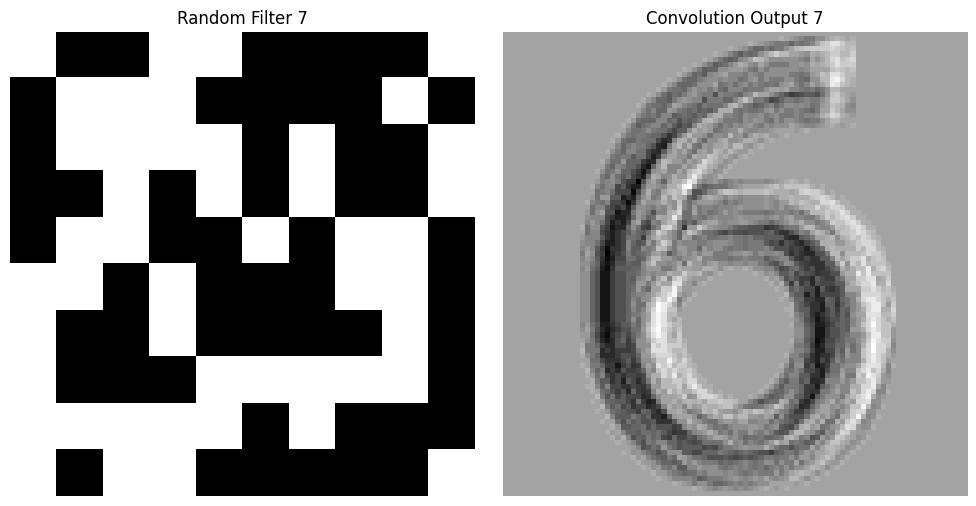

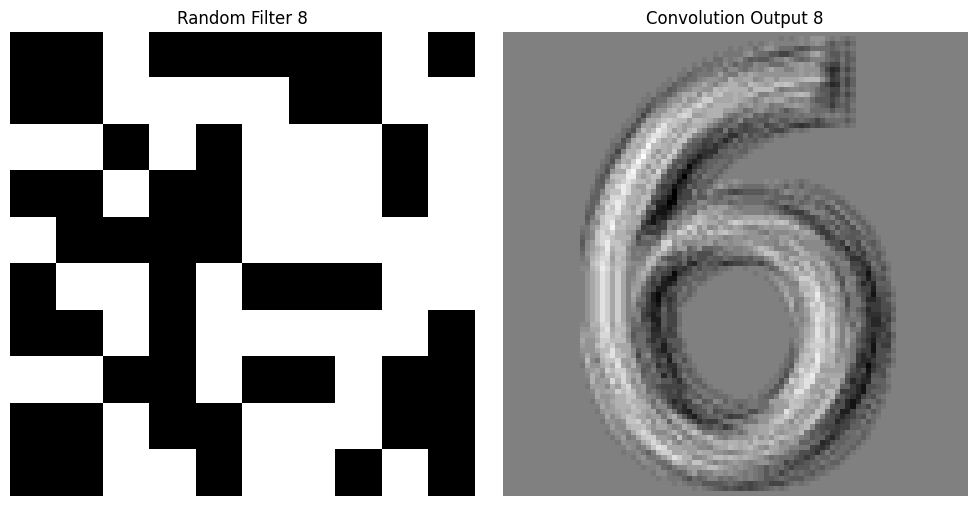

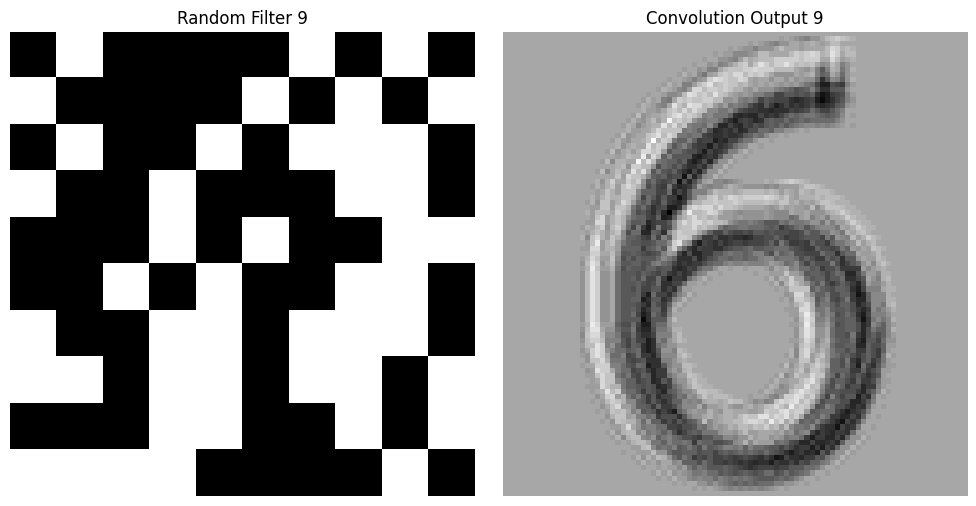

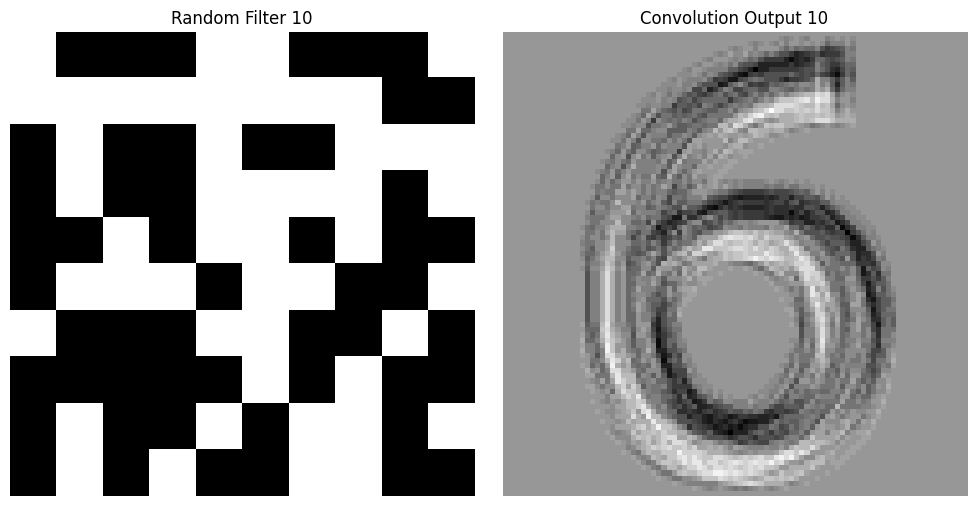

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convolution function
def conv2d(input_array, kernel, padding=0, stride=1):
    input_array = np.array(input_array)
    kernel = np.array(kernel)

    if isinstance(padding, int):
        pad_h = pad_w = padding
    else:
        pad_h, pad_w = padding

    if isinstance(stride, int):
        stride_h = stride_w = stride
    else:
        stride_h, stride_w = stride

    input_padded = np.pad(input_array, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    in_h, in_w = input_padded.shape
    k_h, k_w = kernel.shape

    out_h = ((in_h - k_h) // stride_h) + 1
    out_w = ((in_w - k_w) // stride_w) + 1

    output = np.zeros((out_h, out_w))

    for i in range(out_h):
        for j in range(out_w):
            region = input_padded[i * stride_h : i * stride_h + k_h, j * stride_w : j * stride_w + k_w]
            output[i, j] = np.sum(region * kernel)

    return output

def load_and_resize_digit6(image_path, size=(100, 100)):
    image = Image.open(image_path).convert('L')
    image_resized = image.resize(size, Image.LANCZOS)
    image_array = np.array(image_resized)
    image_array = (image_array > 128).astype(int)
    return image_array

def generate_random_filter():
    return np.random.choice([-1, 1], size=(10, 10))

if __name__ == "__main__":
    digit6_image_path = '6im.jpg'
    digit6_matrix = load_and_resize_digit6(digit6_image_path, size=(100, 100))

    num_filters = 10
    filters = [generate_random_filter() for _ in range(num_filters)]
    conv_results = [conv2d(digit6_matrix, filt, padding=0, stride=1) for filt in filters]

    plt.figure(figsize=(5, 5))
    plt.imshow(digit6_matrix, cmap='gray', interpolation='nearest')
    plt.title("Digit 6 Image (100x100)")
    plt.axis("off")
    plt.show()

    for i in range(num_filters):
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        axs[0].imshow(filters[i], cmap='gray', interpolation='nearest')
        axs[0].set_title(f"Random Filter {i+1}")
        axs[0].axis("off")

        axs[1].imshow(conv_results[i], cmap='gray', interpolation='nearest')
        axs[1].set_title(f"Convolution Output {i+1}")
        axs[1].axis("off")

        plt.tight_layout()
        plt.show()
